<a href="https://colab.research.google.com/github/mraffy16/CaseStudyClustering/blob/main/SC2_PROJECT_DATAMINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pengantar Penambangan Data**

**Study Case 02 - MixITup Ice Cream**

**KELOMPOK 2F:**
1.   Dwi Atika Sari        (11230940000059)
2.   Rahma Saira           (11230940000063)
3.   Muhamad Raffy Izzudin (11230940000064)

# Pendahuluan

MixITup merupakan perusahaan yang berfokus pada penjualan Ice Cream. Saat ini, MixITup telah beroperasi di tiga wilayah, yaitu Jakarta, Depok, dan Tangerang. Seiring dengan meningkatnya permintaan pelanggan, perusahaan berencana untuk memperluas jangkauan usahanya ke kota lain serta melaksanakan strategi pemasaran secara lebih luas.

Melalui program loyalty customer, MixITup telah berhasil mengumpulkan berbagai data pelanggan yang dapat dimanfaatkan untuk proses Data Mining. Analisis ini bertujuan untuk menggali informasi berharga dan menghasilkan rekomendasi strategis bagi perusahaan. Salah satu pendekatan yang dapat digunakan adalah segmentasi pelanggan, yaitu proses pengelompokan konsumen berdasarkan kesamaan karakteristik dan perilaku. Dengan cara ini, MixITup dapat lebih memahami pola konsumsi pelanggan serta merancang strategi pemasaran yang lebih efektif dan terarah.

#Memanggil Data

In [2]:
import pandas as pd
import io
import requests

url = 'https://raw.githubusercontent.com/Dwiatikaa/project-data-mining/refs/heads/main/Case-Study-02-MixITup.csv'

data_clean = pd.read_csv(url, sep=';')

In [3]:
data_clean

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,Rp13.114.754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,Rp33.606.557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,Rp15.983.606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,Rp12.704.918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,Rp20.081.967,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,Rp4.098.360,73,1,Depok,1.0,Senin,0
196,297,Pria,57,Rp15.983.606,51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,Rp43.032.786,79,1,Depok,1.0,Senin,7
198,299,Wanita,23,Rp1.229.508,94,1,Depok,0.0,Selasa,0


#Preprocesing


In [4]:
# Cek dimensi data
data_clean.shape

(200, 10)

In [5]:
# Menghapus kolom ID
data_clean = data_clean.drop('ID', axis=1)

In [6]:
# Cek ukuran dan tipe data
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Jenis Kelamin         196 non-null    object 
 1   Umur                  200 non-null    object 
 2   Pendapatan-per-bulan  200 non-null    object 
 3   skor-pengeluaran      200 non-null    int64  
 4   Menikah               188 non-null    object 
 5   Kota                  200 non-null    object 
 6   Promo                 194 non-null    float64
 7   HariFav               200 non-null    object 
 8   FavFlavor             200 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 14.2+ KB


In [7]:
# Ubah tipe data
data_clean["Umur"] = pd.to_numeric(data_clean["Umur"], errors="coerce").astype("Int64")   # ubah umur ke integer, handle NaN
data_clean["Menikah"] = data_clean["Menikah"].astype("category")                          # ubah ke kategorik
data_clean["FavFlavor"] = data_clean["FavFlavor"].astype("category")
data_clean["Jenis Kelamin"] = data_clean["Jenis Kelamin"].astype("category")
data_clean["Promo"] = data_clean["Promo"].astype("category")
# cek hasil perubahan
data_clean.dtypes

,0
Jenis Kelamin,category
Umur,Int64
Pendapatan-per-bulan,object
skor-pengeluaran,int64
Menikah,category
Kota,object
Promo,category
HariFav,object
FavFlavor,category


## Memeriksa Duplikat


In [8]:
duplikat = data_clean.duplicated(
    subset=['Kota', 'FavFlavor', 'Jenis Kelamin', 'Umur',
            'Pendapatan-per-bulan', 'skor-pengeluaran',
            'Menikah', 'Promo', 'HariFav'], keep=False)

print("Jumlah data duplikat:", duplikat.sum())


Jumlah data duplikat: 0


Tidak ditemukan duplikat

##Memeriksa Missing Value

In [9]:
data_clean.isnull().sum()

,0
Jenis Kelamin,4
Umur,1
Pendapatan-per-bulan,0
skor-pengeluaran,0
Menikah,12
Kota,0
Promo,6
HariFav,0
FavFlavor,0


##Memeriksa Nilai Unik pada Setiap Kolom

In [10]:
data_clean['Jenis Kelamin'].unique()

['Wanita', 'Pria', NaN, '-']
Categories (3, object): ['-', 'Pria', 'Wanita']

In [11]:
data_clean['Kota'].unique()

array(['Jakarta', 'Depok', 'Tangerang', 'JJakarta'], dtype=object)

In [12]:
data_clean['Menikah'].unique()

['1', '0', NaN, ' ', '-']
Categories (4, object): [' ', '-', '0', '1']

In [13]:
data_clean['Umur'].unique()

<IntegerArray>
[  49,   32,   51,   19,   38,   33,   27,   24,   21,   31,   36,   46,   60,
   58,   47,   45,   22,   18,   59,   44,   39,   35,   20,   30,   23,   48,
   37,   40,   34,   41,   53,   54,   28,   55,   25,   50,   42,   29,   43,
   52,    2, <NA>,   56,   26,   57]
Length: 45, dtype: Int64

In [14]:
data_clean['Pendapatan-per-bulan'].unique()

array(['Rp13.114.754', 'Rp33.606.557', 'Rp15.983.606', 'Rp12.704.918',
       'Rp20.081.967', 'Rp29.098.360', 'Rp21.311.475', 'Rp2.049.180',
       'Rp13.524.590', 'Rp19.262.295', 'Rp11.475.409', 'Rp29.508.196',
       'Rp34.016.393', 'Rp6.147.540', 'Rp11.885.245', 'Rp25.819.672',
       'Rp25.000.000', 'Rp5.327.868', 'Rp9.836.065', 'Rp23.770.491',
       'Rp22.950.819', 'Rp1.229.508', 'Rp9.016.393', 'Rp9.426.229',
       'Rp29.918.032', 'Rp28.688.524', 'Rp27.049.180', 'Rp18.442.622',
       'Rp19.672.131', 'Rp11.065.573', 'Rp36.065.573', 'Rp20.491.803',
       'Rp17.622.950', 'Rp409.836', 'Rp25.409.836', 'Rp1.639.344',
       'Rp5.737.704', 'Rp34.426.229', 'Rp10.245.901', 'Rp50.000.000',
       'Rp14.344.262', 'Rp35.245.901', 'Rp7.377.049', 'Rp45.491.803',
       'Rp40.163.934', 'Rp17.213.114', 'Rp23.360.655', 'Rp7.786.885',
       'Rp18.852.459', 'Rp22.131.147', 'Rp3.688.524', 'Rp2.459.016',
       'Rp3.278.688', 'Rp18.032.786', 'Rp24.180.327', 'Rp22.540.983',
       'Rp819.672', 'Rp

In [15]:
# hapus simbol "Rp", spasi, dan karakter asing
data_clean['Pendapatan-per-bulan'] = (
    data_clean['Pendapatan-per-bulan']
    .str.replace('Rp', '', regex=False)
    .str.replace(r'[^0-9,]', '', regex=True)  # sisakan angka dan koma aja
    .str.strip()
)

# ubah koma jadi titik untuk desimal (kalau ada)
data_clean['Pendapatan-per-bulan'] = data_clean['Pendapatan-per-bulan'].str.replace(',', '.')

data_clean['Pendapatan-per-bulan'].unique()

array(['13114754', '33606557', '15983606', '12704918', '20081967',
       '29098360', '21311475', '2049180', '13524590', '19262295',
       '11475409', '29508196', '34016393', '6147540', '11885245',
       '25819672', '25000000', '5327868', '9836065', '23770491',
       '22950819', '1229508', '9016393', '9426229', '29918032',
       '28688524', '27049180', '18442622', '19672131', '11065573',
       '36065573', '20491803', '17622950', '409836', '25409836',
       '1639344', '5737704', '34426229', '10245901', '50000000',
       '14344262', '35245901', '7377049', '45491803', '40163934',
       '17213114', '23360655', '7786885', '18852459', '22131147',
       '3688524', '2459016', '3278688', '18032786', '24180327',
       '22540983', '819672', '13934426', '26229508', '31967213',
       '24590163', '43032786', '0', '4098360'], dtype=object)

In [16]:
data_clean['skor-pengeluaran'].unique()

array([ 52,  86,  41,  55,  42,  95,  56,  77,  47,  54,  92,  15,   4,
        50,  16,  87,  32,  28,  79,  59,  60,   7,  75,  57,   6,  73,
        69,  40,   5,  89,  49,  13,  88,  48,  10,  36,   3,  31,  39,
        46,  83,  68,  14,  24,  65,  91,  61,  90,  58,  93,  34,  44,
        17,  53,  97,  27,  11,  43,  22,  18,  35,  99,  66,  29,   9,
        45,  23,  82, 101,  51,  20,  72,  71,   1,  81,  98,  26,  76,
        78,  63,  74,  85,  12,   8,  94])

In [17]:
data_clean['Promo'].unique()

[1.0, 2.0, 0.0, NaN, 3.0, 5.0]
Categories (5, float64): [0.0, 1.0, 2.0, 3.0, 5.0]

In [18]:
data_clean['HariFav'].unique()

array(['Sabtu', 'Minggu', 'Rabu', 'Senin', 'Selasa', 'Jumat', 'Kamis'],
      dtype=object)

In [19]:
data_clean['FavFlavor'].unique()

[2, 6, 3, 7, 8, 0, 5, 4, 1, 9]
Categories (10, int64): [0, 1, 2, 3, ..., 6, 7, 8, 9]

##Penanganan missing value dan noise

###Menghapus Baris yang Tidak Valid

In [20]:
# Menampilkan data: Terdapat Variabel Pendapatan dan Jenis kelamin dua-duanya tidak valid
data_clean[data_clean['Jenis Kelamin'] == '-']

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
185,-,21,0,81,0,Depok,1.0,Jumat,0


In [21]:
data_clean = data_clean.drop(index=185)

###Penanganan Missing Value pada Jenis Kelamin

In [22]:
# Cari modus (nilai yang paling sering muncul)
import numpy as np
modus_jenis_kelamin = data_clean['Jenis Kelamin'].mode()[0]

# Ganti semua bentuk data tidak valid dengan NaN
data_clean['Jenis Kelamin'] = data_clean['Jenis Kelamin'].replace(['-', '', ' '], np.nan)

# Imputasi nilai NaN dengan modus
data_clean['Jenis Kelamin'] = data_clean['Jenis Kelamin'].fillna(modus_jenis_kelamin)


/tmp/ipython-input-379640488.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_clean['Jenis Kelamin'] = data_clean['Jenis Kelamin'].replace(['-', '', ' '], np.nan)


###Penangan Noise pada Kota

In [23]:
# Ubah nilai 'JJakarta' jadi 'Jakarta'
data_clean['Kota'] = data_clean['Kota'].replace('JJakarta', 'Jakarta')

###Penanganan Missing Value pada Umur

In [24]:
 # Mengisi nilai kosong (NaN) pada kolom 'Umur' dengan nilai median
data_clean['Umur'].fillna(data_clean['Umur'].median(), inplace=True)

/tmp/ipython-input-684621206.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_clean['Umur'].fillna(data_clean['Umur'].median(), inplace=True)


###Penanganan Noise Pada Umur

In [25]:
# Menghapus tanda kutip (atau karakter lainnya yang tidak valid) dari kolom yang bermasalah
data_clean['Umur'] = data_clean['Umur'].replace({"'": ""}, regex=True)

In [26]:
# Ganti nilai umur = 2 dengan median umur berdasarkan kombinasi Jenis Kelamin dan Menikah
for (jk, menikah), group in data_clean.groupby(['Jenis Kelamin', 'Menikah']):
    median_umur = group['Umur'].median()
    data_clean.loc[
        (data_clean['Umur'] == 2) &
        (data_clean['Jenis Kelamin'] == jk) &
        (data_clean['Menikah'] == menikah),
        'Umur'
    ] = median_umur

/tmp/ipython-input-2542500266.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for (jk, menikah), group in data_clean.groupby(['Jenis Kelamin', 'Menikah']):


###Penanganan Missing Value Pada Menikah

Mengisi Missing Value menikah berdasarkan umur dan jenis kelamin

In [27]:
# Bersihkan nilai salah input ---
# Ganti spasi, '-', atau string kosong menjadi NaN
data_clean['Menikah'] = data_clean['Menikah'].replace([' ', '-', ''], pd.NA)

# Ubah tipe data ke numerik
data_clean['Menikah'] = pd.to_numeric(data_clean['Menikah'], errors='coerce')

# Hitung median umur per kelompok Jenis Kelamin & Menikah ---
medians = data_clean.groupby(['Jenis Kelamin', 'Menikah'])['Umur'].median().unstack()

# Hitung threshold otomatis = titik tengah antara median belum menikah (0) & menikah (1)
thresholds = (medians[0] + medians[1]) / 2
print(thresholds)

# Imputasi otomatis berdasarkan Umur dan Jenis Kelamin ---
for idx, row in data_clean[data_clean['Menikah'].isna()].iterrows():
    gender = row['Jenis Kelamin']
    umur = row['Umur']
    if pd.notna(umur) and gender in thresholds.index:
        batas = thresholds[gender]
        data_clean.loc[idx, 'Menikah'] = 1 if umur >= batas else 0

# Ubah tipe data kembali ke category setelah imputasi
data_clean['Menikah'] = data_clean['Menikah'].astype('category')

# Cek hasil setelah imputasi ---
print("\nDistribusi setelah imputasi:")
print(data_clean['Menikah'].value_counts(dropna=False))

Jenis Kelamin
Pria      30.0
Wanita    28.5
dtype: Float64

Distribusi setelah imputasi:
Menikah
1.0    174
0.0     25
Name: count, dtype: int64


/tmp/ipython-input-1995963064.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_clean['Menikah'] = data_clean['Menikah'].replace([' ', '-', ''], pd.NA)
/tmp/ipython-input-1995963064.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = data_clean.groupby(['Jenis Kelamin', 'Menikah'])['Umur'].median().unstack()


###Penanganan Missing Value Pada Promo

In [28]:
# Ubah sementara tipe data jadi object agar bisa diganti nilai NaN
data_clean['Promo'] = data_clean['Promo'].astype('object')

# Ubah nilai 5 jadi NaN
data_clean.loc[data_clean['Promo'] == 5, 'Promo'] = pd.NA

# Ubah tanda '-', kosong, atau spasi jadi NaN juga (kalau ada)
data_clean['Promo'].replace(['-', '', ' '], pd.NA, inplace=True)

# Isi semua NaN dengan modus (nilai paling sering muncul)
mode_promo = data_clean['Promo'].mode()[0]
data_clean['Promo'] = data_clean['Promo'].fillna(mode_promo)

# Kembalikan tipe data ke category setelah selesai
data_clean['Promo'] = data_clean['Promo'].astype('category')


/tmp/ipython-input-2516338489.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_clean['Promo'].replace(['-', '', ' '], pd.NA, inplace=True)
/tmp/ipython-input-2516338489.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_clean['Promo'] = data_clean['Promo'].fillna(mode_promo)


###Penanganan Noise pada Skor Pengeluaran

In [29]:
# Membatasi (memotong) nilai maksimum pada kolom 'skor-pengeluaran' agar tidak melebihi 100
data_clean['skor-pengeluaran'] = data_clean['skor-pengeluaran'].clip(upper=100)

###Penanganan Noise pada FavFlavor

In [30]:
# Menghapus baris dengan nilai 9 pada kolom 'FavFlavor'
data_clean = data_clean[data_clean['FavFlavor'] != 9]

### Menampilkan baris data yang tidak logis seperti pendapatan = 0

In [31]:
# Menampilkan baris yang memiliki nilai 0 pada kolom Pendapatan per bulan
data_clean[data_clean['Pendapatan-per-bulan'] == 0]

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor


Baris ini tidak dihapus karena datanya masih masuk akal. Umur customer 19 tahun, jadi kemungkinan masih pelajar dan belum punya penghasilan tetap (makanya pendapatannya 0). Jadi datanya tetap dipakai karena masih relevan.

## Memeriksa Outlier

In [32]:
# Convert 'Pendapatan-per-bulan' to numeric
data_clean['Pendapatan-per-bulan'] = pd.to_numeric(data_clean['Pendapatan-per-bulan'], errors='coerce')

# Hitung Q1 dan Q3
Q1 = data_clean['Pendapatan-per-bulan'].quantile(0.25)
Q3 = data_clean['Pendapatan-per-bulan'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah & batas atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Batas Bawah: {batas_bawah}")
print(f"Batas Atas: {batas_atas}")

# Cari baris outlier
outlier = data_clean[(data_clean['Pendapatan-per-bulan'] < batas_bawah) | (data_clean['Pendapatan-per-bulan'] > batas_atas)]
print(f"Jumlah outlier: {len(outlier)}")
outlier.head()

Q1: 11065573.0
Q3: 25819672.0
IQR: 14754099.0
Batas Bawah: -11065575.5
Batas Atas: 47950820.5
Jumlah outlier: 2


,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
66,Pria,30,50000000,83,1.0,Depok,1.0,Sabtu,3
102,Pria,32,50000000,18,1.0,Tangerang,3.0,Senin,6


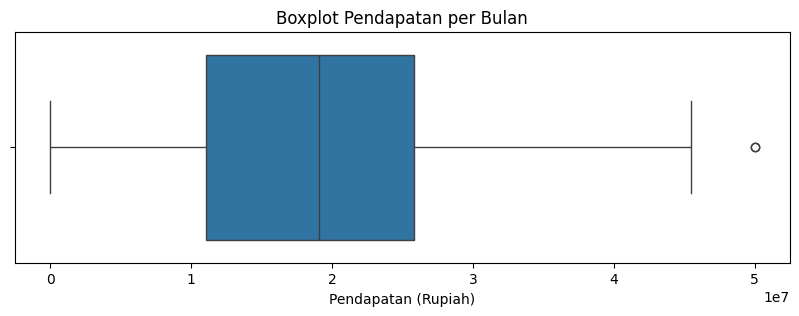

In [33]:
# memvisualisasikan outlier pada kolom 'Pendapatan-per-bulan'
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,3))
sns.boxplot(x=data_clean['Pendapatan-per-bulan'])
plt.title('Boxplot Pendapatan per Bulan')
plt.xlabel('Pendapatan (Rupiah)')
plt.show()

Ditemukan 2 outlier pada data. 2 data ini tidak dihapus karena meskipun pendapatannya tinggi (Rp 50 juta), nilai tersebut tidak terlalu memengaruhi rata-rata pendapatan keseluruhan.
Selain itu, pelanggan ini masih tergolong wajar karena sudah menikah dan berusia 30-32 tahun, jadi kemungkinan memang memiliki pendapatan tinggi.
Karena tidak memberikan pengaruh besar terhadap hasil analisis dan masih masuk akal secara konteks bisnis, data outlier ini tetap dipertahankan.

Akan di cek kembali missing value dan ukuran data setelah diatasi

In [34]:
data_clean.isnull().sum()

,0
Jenis Kelamin,0
Umur,0
Pendapatan-per-bulan,0
skor-pengeluaran,0
Menikah,0
Kota,0
Promo,0
HariFav,0
FavFlavor,0


In [35]:
data_clean.shape

(198, 9)

##Eksplorasi Data

## Statistik Deskriptif

In [36]:
data_clean.describe()

,Umur,Pendapatan-per-bulan,skor-pengeluaran
count,198.0,1.980000e+02,198.000000
mean,37.494949,1.873034e+07,50.464646
std,11.790794,1.072439e+07,26.012419
min,18.0,0.000000e+00,1.000000
25%,29.0,1.106557e+07,35.000000
50%,36.0,1.905738e+07,50.000000
75%,48.0,2.581967e+07,73.000000
max,60.0,5.000000e+07,100.000000


## Cek Tipe Data

In [37]:
data_clean.dtypes

,0
Jenis Kelamin,category
Umur,Int64
Pendapatan-per-bulan,int64
skor-pengeluaran,int64
Menikah,category
Kota,object
Promo,category
HariFav,object
FavFlavor,category


## Cek Distribusi Data

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd

### Distribusi Data Numerik

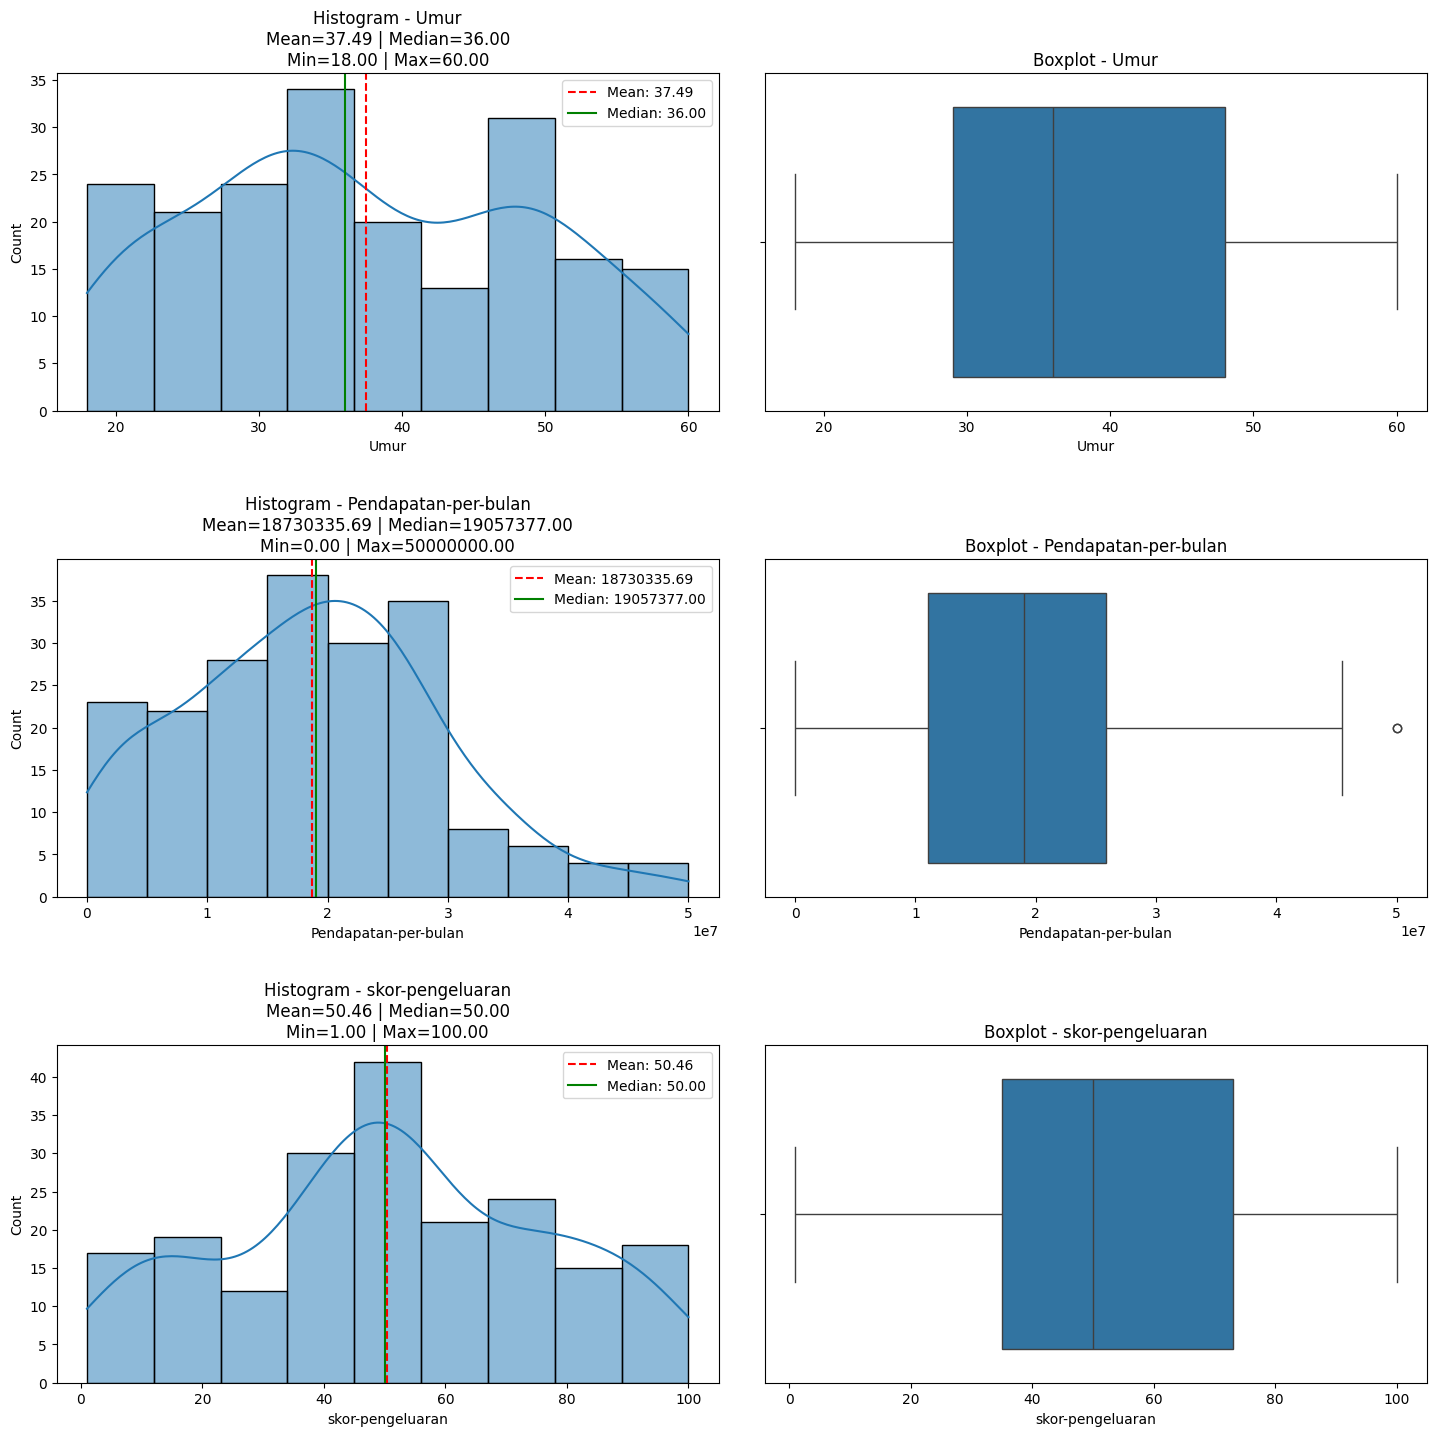

In [39]:
# Pilih kolom numerik (int dan float)
num_cols = data_clean.select_dtypes(include='int').columns

# Ukuran figure disesuaikan jumlah kolom
n = len(num_cols)
rows = n
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(15, 5*n))  # tinggi per baris 5

for i, col in enumerate(num_cols):
    # Histogram
    mean_val = data_clean[col].mean()
    median_val = data_clean[col].median()
    min_val = data_clean[col].min()
    max_val = data_clean[col].max()

    sns.histplot(data_clean[col], kde=True, ax=axes[i, 0])
    axes[i, 0].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[i, 0].axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
    axes[i, 0].set_title(f'Histogram - {col}\nMean={mean_val:.2f} | Median={median_val:.2f}\nMin={min_val:.2f} | Max={max_val:.2f}')
    axes[i, 0].legend()

    # Boxplot
    sns.boxplot(x=data_clean[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot - {col}')

plt.tight_layout(pad=3)  # kasih jarak antar plot
plt.show()

**Umur**: Sebagian besar pelanggan berusia 30–40 tahun dengan distribusi normal dan tanpa outlier berarti.

**Pendapatan per bulan**: Rata-rata pendapatan sekitar 18 juta dengan sedikit outlier berpendapatan tinggi yang tidak memengaruhi rata-rata secara signifikan.

**Skor pengeluaran**: Skor pengeluaran tersebar seimbang di semua pelanggan tanpa adanya outlier ekstrem.

### Distribusi Data Kategorik

/tmp/ipython-input-512063415.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=data_clean, palette='Set2')
/tmp/ipython-input-512063415.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=data_clean, palette='Set2')
/tmp/ipython-input-512063415.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=data_clean, palette='Set2')
/tmp/ipython-input-512063415.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` vari

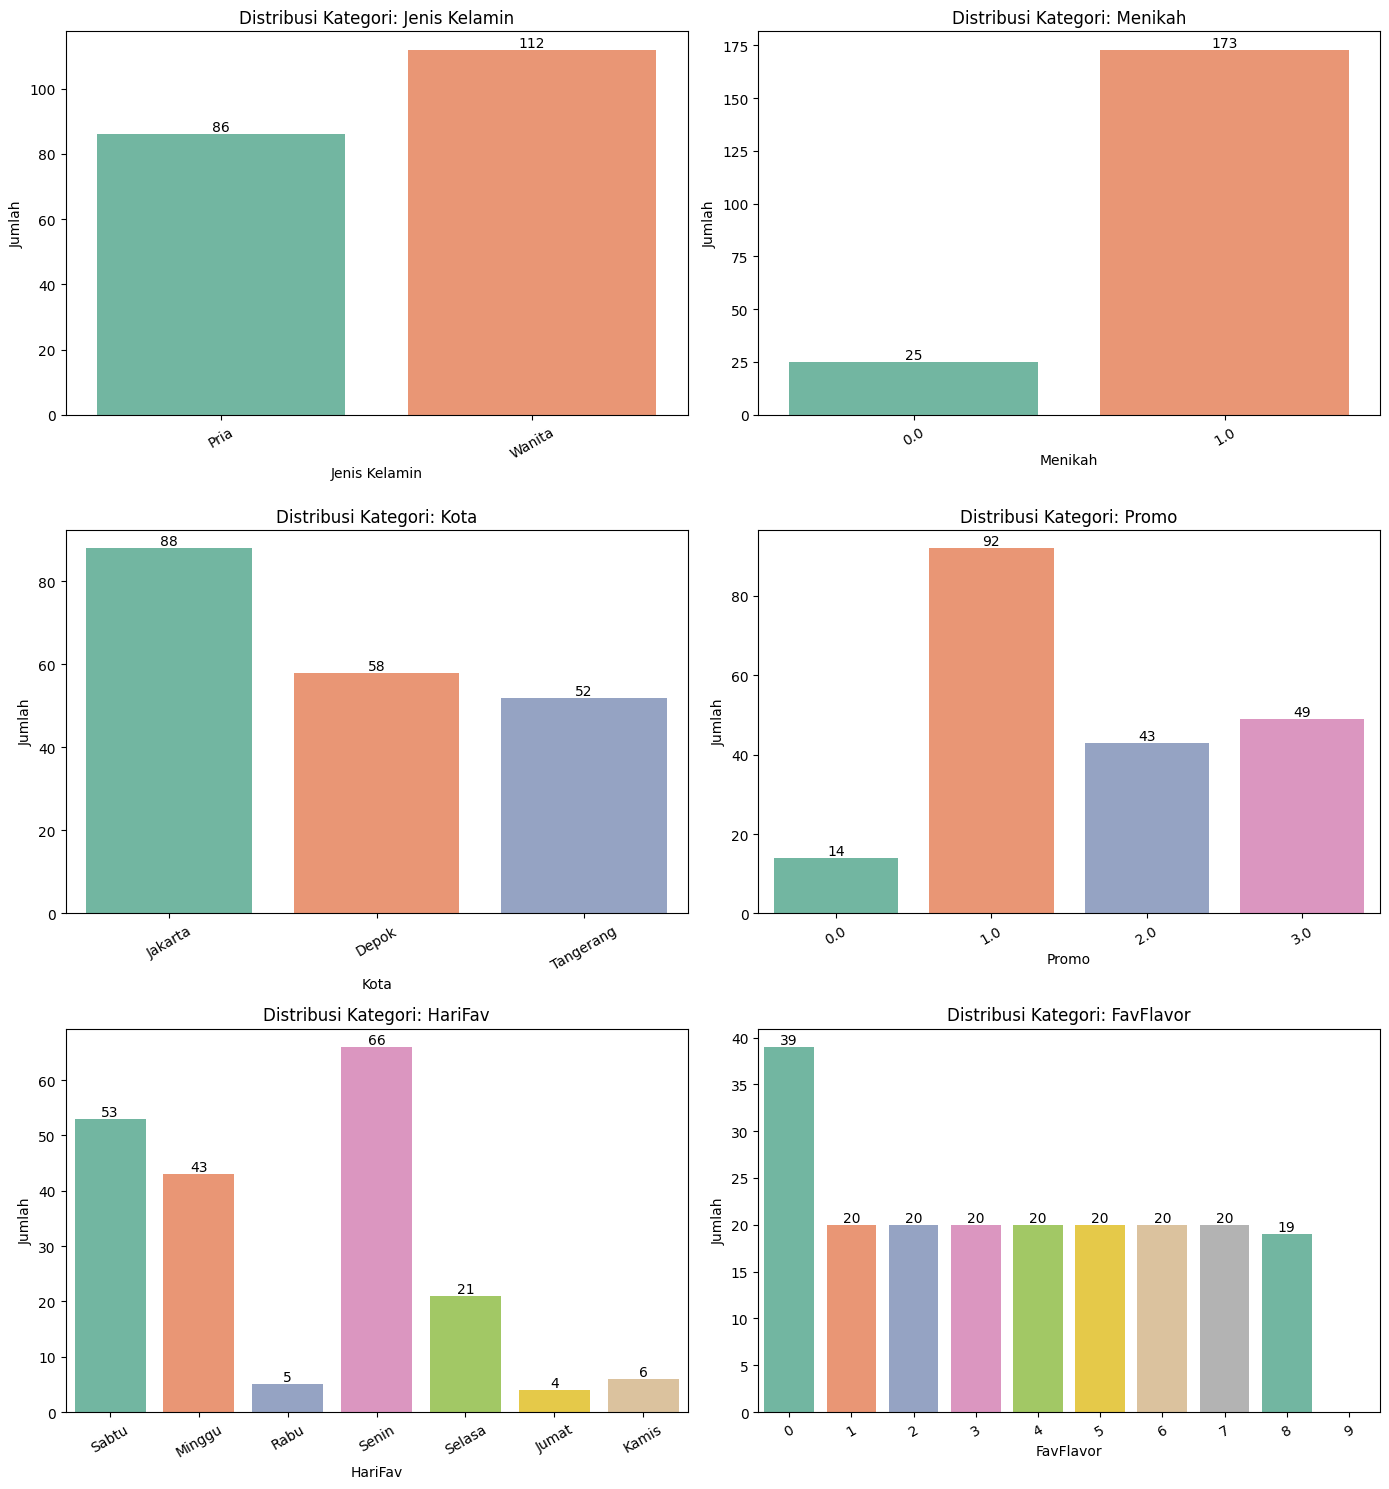

In [40]:
# Pilih kolom kategorik
cat_cols = data_clean.select_dtypes(include=['object','category']).columns

# Tentukan layout
n = len(cat_cols)
n_cols = 2
n_rows = math.ceil(n / n_cols)

plt.figure(figsize=(14, 5 * n_rows))

for i, col in enumerate(cat_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    ax = sns.countplot(x=col, data=data_clean, palette='Set2')
    plt.title(f'Distribusi Kategori: {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=30)

    # Tambahkan label angka di atas batang
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}',                  # nilai frekuensi
            (p.get_x() + p.get_width() / 2., p.get_height()), # posisi tengah batang
            ha='center', va='bottom', fontsize=10, color='black'
        )

plt.tight_layout()
plt.show()

**Jenis Kelamin**: Pelanggan wanita (112 orang) lebih banyak dibandingkan pria (86 orang), menunjukkan target pasar didominasi oleh wanita.

**Status Menikah**: Mayoritas pelanggan sudah menikah (173 orang), menandakan produk MixITup banyak diminati oleh konsumen keluarga atau dewasa muda.

**Kota**: Cabang Jakarta memiliki pelanggan terbanyak (88 orang), diikuti Depok (58) dan Tangerang (53), menunjukkan potensi pasar terbesar masih di Jakarta.

**Promo**: Jenis promo 1 paling sering digunakan (92 pelanggan), menandakan promo tersebut paling menarik perhatian konsumen.

**Hari Favorit (HariFav)**: Hari Senin paling sering dipilih sebagai hari favorit (66 pelanggan), sedangkan Jumat dan Rabu paling sedikit, menunjukkan aktivitas pembelian lebih ramai di awal minggu.

**FavFlavor**: Varian rasa 0 paling populer (39 pelanggan), sedangkan lainnya memiliki distribusi seimbang, menunjukkan adanya satu rasa unggulan yang paling diminati.

### Hubungan Antar Variabel

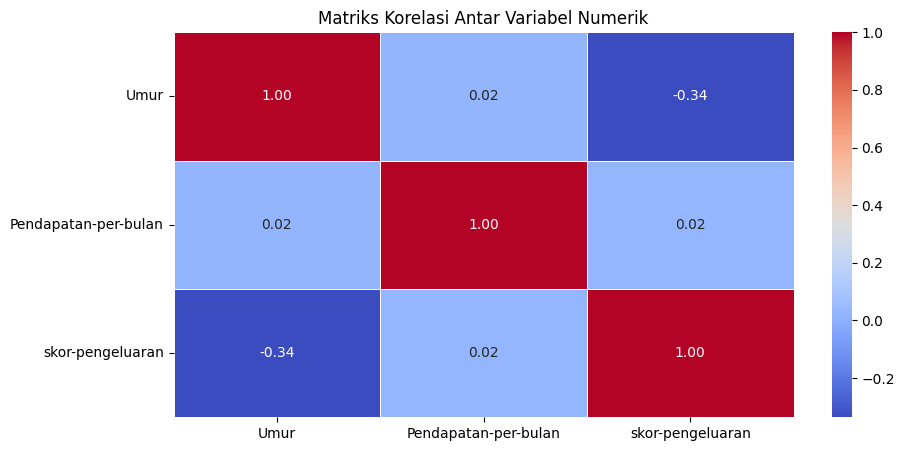

In [41]:
# korelasi antar variabel numerik

# Pilih kolom numerik
num_cols = data_clean.select_dtypes(include='int').columns

# Hitung korelasi
corr_matrix = data_clean[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi Antar Variabel Numerik')
plt.show()

Tidak ada hubungan kuat antar variabel numerik, sehingga perilaku pengeluaran pelanggan tidak banyak dipengaruhi oleh umur atau pendapatan

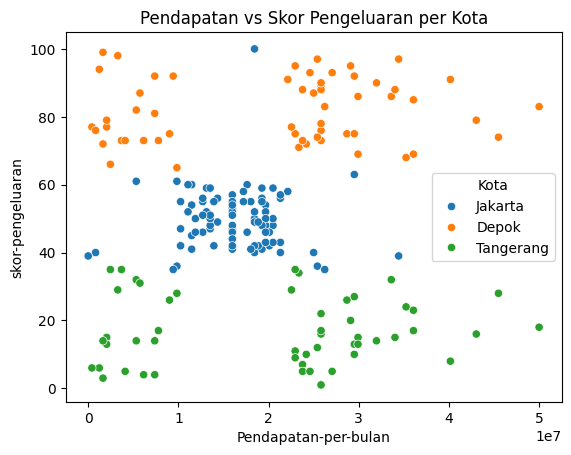

In [42]:
# hubungan antara pendapatan dan skor pengeluaran berdasarkan kota

sns.scatterplot(x='Pendapatan-per-bulan', y='skor-pengeluaran', hue='Kota', data=data_clean)
plt.title('Pendapatan vs Skor Pengeluaran per Kota')
plt.show()

Kota Depok memiliki pelanggan dengan skor pengeluaran tertinggi, meskipun sebagian besar pendapatannya tidak terlalu besar.

Kota Jakarta menunjukkan pendapatan menengah dengan skor pengeluaran sedang, menggambarkan perilaku pelanggan yang lebih seimbang antara pendapatan dan pengeluaran.

Kota Tangerang cenderung memiliki skor pengeluaran rendah meskipun pendapatan bervariasi, yang menunjukkan bahwa pelanggan di sana lebih hemat atau selektif dalam pengeluaran.

/tmp/ipython-input-693779874.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='FavFlavor', y='skor-pengeluaran', data=data_clean, estimator='mean', ci=None)


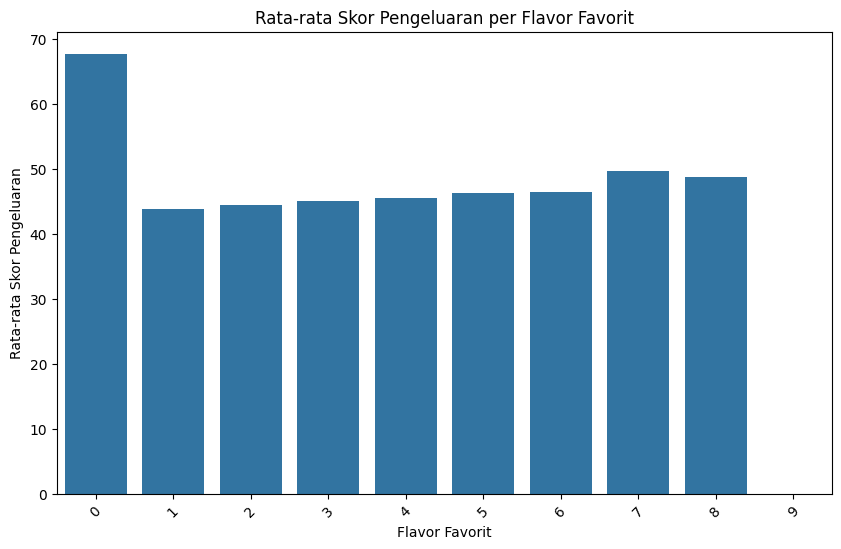

In [43]:
# hubungan antara skor pengeluaran dan favFlavor

plt.figure(figsize=(10,6))
sns.barplot(x='FavFlavor', y='skor-pengeluaran', data=data_clean, estimator='mean', ci=None)
plt.title('Rata-rata Skor Pengeluaran per Flavor Favorit')
plt.xlabel('Flavor Favorit')
plt.ylabel('Rata-rata Skor Pengeluaran')
plt.xticks(rotation=45)
plt.show()

Flavor 0 (vanilla) memiliki rata-rata skor pengeluaran tertinggi, menunjukkan bahwa pelanggan dengan rasa ini lebih loyal dan cenderung mengeluarkan uang lebih banyak.

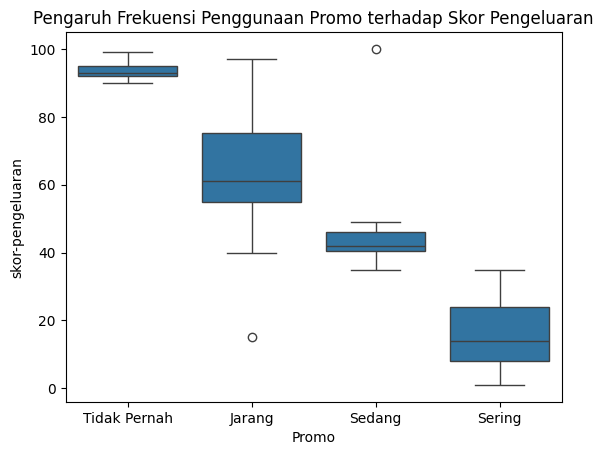

In [44]:
# hubungan antara promo dan skor pengeluaran

sns.boxplot(x='Promo', y='skor-pengeluaran', data=data_clean)
plt.title('Pengaruh Frekuensi Penggunaan Promo terhadap Skor Pengeluaran')
plt.xticks([0,1,2,3], ['Tidak Pernah', 'Jarang', 'Sedang', 'Sering'])
plt.show()

Pelanggan yang tidak pernah pakai promo punya skor pengeluaran tertinggi dan paling konsisten.

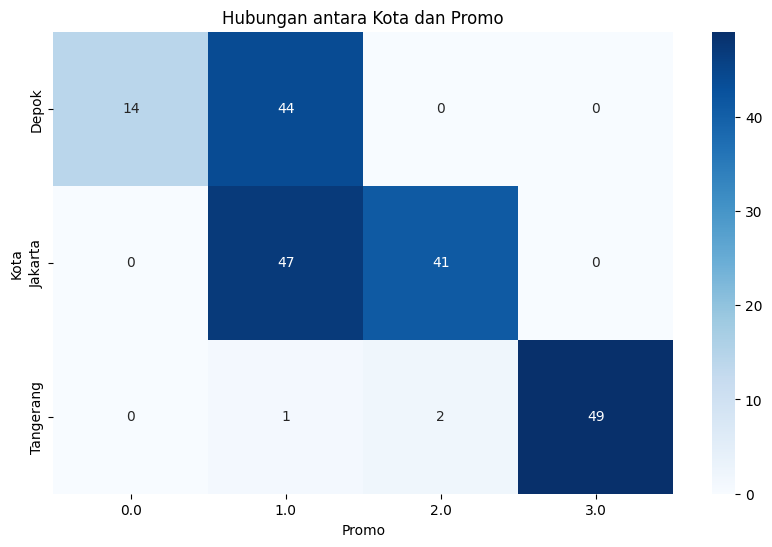

In [45]:
# hubungan antara kota dan promo

# Membuat crosstab untuk menghitung frekuensi setiap kombinasi kategori
crosstab = pd.crosstab(data_clean['Kota'], data_clean['Promo'])

# Mengubah crosstab menjadi DataFrame untuk visualisasi
# crosstab = crosstab.reset_index() # Remove this line to keep 'kota' as index

# Melt the dataframe to long-form for seaborn plotting
# crosstab_melted = pd.melt(crosstab, id_vars='kota', value_name='Count') # This is for barplot, not heatmap

# Membuat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues') # crosstab is now a DataFrame with numerical values

# Menambahkan judul dan label
plt.title('Hubungan antara Kota dan Promo')
plt.xlabel('Promo')
plt.ylabel('Kota')

# Menampilkan plot
plt.show()

Kota Depok : Mayoritas pelanggan jarang menggunakan promo (44 orang), sebagian kecil tidak pernah.

Kota Jakarta : Didominasi pelanggan yang jarang (47) dan sedang (41) menggunakan promo.

Kota Tangerang : Hampir semua pelanggan sering menggunakan promo (50 orang).

## Mengonversi Data Kategorik Dengan Label Encoder

In [46]:
# Import library
from sklearn.preprocessing import LabelEncoder

# Tambahkan semua kolom kategorik (termasuk HariFav dan Promo kalau kategorik)
col_cat = ['Jenis Kelamin', 'Kota', 'Menikah', 'FavFlavor', 'HariFav', 'Promo']

# Salin data kategorik dari data_clean
df_encode = data_clean[col_cat].copy()

# Simpan LabelEncoder untuk tiap kolom
label_encoders = {}

for col in col_cat:
    le = LabelEncoder()
    df_encode[col] = le.fit_transform(df_encode[col].astype(str))  # ubah ke string biar aman dari NaN
    label_encoders[col] = le

# Tampilkan mapping hasil encoding
for col, le in label_encoders.items():
    print(f"Makna untuk kolom '{col}':")
    for i, class_label in enumerate(le.classes_):
        print(f"  {i}: {class_label}")
    print("\n")

# Lihat hasil encode 5 baris pertama
print(df_encode.head())



Makna untuk kolom 'Jenis Kelamin':
  0: Pria
  1: Wanita


Makna untuk kolom 'Kota':
  0: Depok
  1: Jakarta
  2: Tangerang


Makna untuk kolom 'Menikah':
  0: 0.0
  1: 1.0


Makna untuk kolom 'FavFlavor':
  0: 0
  1: 1
  2: 2
  3: 3
  4: 4
  5: 5
  6: 6
  7: 7
  8: 8


Makna untuk kolom 'HariFav':
  0: Jumat
  1: Kamis
  2: Minggu
  3: Rabu
  4: Sabtu
  5: Selasa
  6: Senin


Makna untuk kolom 'Promo':
  0: 0.0
  1: 1.0
  2: 2.0
  3: 3.0


   Jenis Kelamin  Kota  Menikah  FavFlavor  HariFav  Promo
0              1     1        1          2        4      1
1              1     0        1          6        2      1
2              0     1        1          3        2      2
3              0     1        0          7        3      1
4              1     1        1          8        6      2


In [47]:
df_encode['HariFav'].value_counts()

,count
HariFav,
6,66
4,53
2,43
5,21
1,6
3,5
0,4


In [48]:
data_clean['HariFav'].value_counts()


,count
HariFav,
Senin,66
Sabtu,53
Minggu,43
Selasa,21
Kamis,6
Rabu,5
Jumat,4


In [49]:
df_encode['Jenis Kelamin'].value_counts()

,count
Jenis Kelamin,
1,112
0,86


In [50]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Pilih kolom numerik dari data_clean
col_num = ['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']

# Lakukan standarisasi (mean=0, std=1)
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(data_clean[col_num]), columns=col_num)

# Reset index agar sama dengan df_encode
df_encode.reset_index(drop=True, inplace=True)
df_std.reset_index(drop=True, inplace=True)

# Gabungkan hasil encode dan standar
df_model = df_encode.merge(df_std, left_index=True, right_index=True, how='left')

# Lihat hasil gabungan
df_model.head()


,Jenis Kelamin,Kota,Menikah,FavFlavor,HariFav,Promo,Umur,Pendapatan-per-bulan,skor-pengeluaran
0,1,1,1,2,4,1,0.978239,-0.524955,0.059173
1,1,0,1,6,2,1,-0.467219,1.390656,1.369555
2,0,1,1,3,2,2,1.148293,-0.256769,-0.364773
3,0,1,0,7,3,1,-1.572569,-0.563267,0.174795
4,1,1,1,8,6,2,0.042943,0.126353,-0.326233


In [51]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Jenis Kelamin         198 non-null    int64  
 1   Kota                  198 non-null    int64  
 2   Menikah               198 non-null    int64  
 3   FavFlavor             198 non-null    int64  
 4   HariFav               198 non-null    int64  
 5   Promo                 198 non-null    int64  
 6   Umur                  198 non-null    float64
 7   Pendapatan-per-bulan  198 non-null    float64
 8   skor-pengeluaran      198 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 14.1 KB


##Clustering

###Standarisasi Data Menggunakan StandardScaler

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_model)

###Menentukan Jumlah Cluster Optimal dengan Metode Elbow Menggunakan KMeans dan KElbowVisualizer

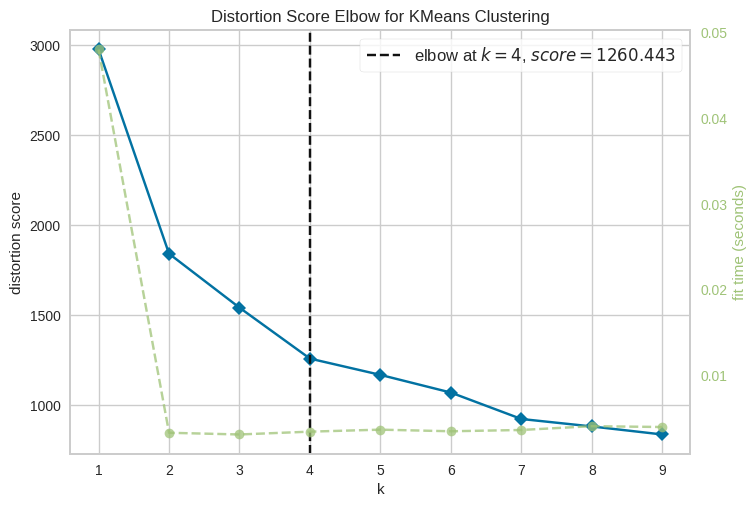

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans(random_state=42, n_init='auto')

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df_model)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

###Penerapan K-Means dengan 4 Klaster

In [54]:
# Inisialisasi model KMeans dengan 4 klaster
kmeans_model = KMeans(n_clusters=4, random_state=42, n_init='auto')

# Latih model dengan data yang sudah diskalakan
kmeans_model.fit(data_scaled)

# Tambahkan label klaster ke dataframe asli
data_clean['Cluster'] = kmeans_model.labels_

# Tampilkan beberapa baris data dengan label klaster
display(data_clean.head())

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor,Cluster
0,Wanita,49,13114754,52,1.0,Jakarta,1.0,Sabtu,2,2
1,Wanita,32,33606557,86,1.0,Depok,1.0,Minggu,6,3
2,Pria,51,15983606,41,1.0,Jakarta,2.0,Minggu,3,2
3,Pria,19,12704918,55,0.0,Jakarta,1.0,Rabu,7,0
4,Wanita,38,20081967,42,1.0,Jakarta,2.0,Senin,8,2


In [55]:
clusters4 = kmeans_model.predict(df_model)
print('Segmen Pelanggan: {}\n'.format(clusters4))

# Menggabungkan data awal dan segmen pelanggan
df_final = data_clean.copy()
df_final['cluster'] = clusters4
print(df_final.head(15))

Segmen Pelanggan: [1 3 1 0 1 3 0 0 1 1 0 3 1 1 1 1 1 2 1 1 0 0 1 1 0 0 1 1 0 0 3 3 2 1 1 1 1
 3 1 0 1 1 3 1 3 1 0 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 0 1 1 1 1
 0 1 1 3 3 1 3 1 3 1 1 1 1 1 1 3 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 3 0 1 0 0
 3 0 1 1 1 1 1 3 0 1 1 1 1 1 3 1 1 1 1 3 1 1 1 1 1 3 0 0 1 3 0 1 1 0 0 1 0
 1 1 3 1 1 3 3 1 3 3 1 3 0 3 1 3 1 3 1 0 3 0 1 1 0 3 1 1 0 0 3 1 3 1 0 1 1
 0 1 1 1 3 3 1 2 3 1 3 3 1]

   Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran Menikah  \
0         Wanita    49              13114754                52     1.0   
1         Wanita    32              33606557                86     1.0   
2           Pria    51              15983606                41     1.0   
3           Pria    19              12704918                55     0.0   
4         Wanita    38              20081967                42     1.0   
5         Wanita    33              29098360                95     1.0   
6           Pria    27              21311475                

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [56]:
from sklearn.metrics import silhouette_score

score = silhouette_score(data_scaled, clusters4)
print("Silhouette Score:", score)

Silhouette Score: 0.134256454880654


###Penerapan K-Means dengan 3 Klaster

In [57]:
# Inisialisasi model KMeans dengan 3 klaster
kmeans_model = KMeans(n_clusters=3, random_state=42, n_init='auto')

# Latih model dengan data yang sudah diskalakan
kmeans_model.fit(data_scaled)

# Tambahkan label klaster ke dataframe asli
data_clean['Cluster'] = kmeans_model.labels_

# Tampilkan beberapa baris data dengan label klaster
display(data_clean.head())

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor,Cluster
0,Wanita,49,13114754,52,1.0,Jakarta,1.0,Sabtu,2,2
1,Wanita,32,33606557,86,1.0,Depok,1.0,Minggu,6,0
2,Pria,51,15983606,41,1.0,Jakarta,2.0,Minggu,3,2
3,Pria,19,12704918,55,0.0,Jakarta,1.0,Rabu,7,0
4,Wanita,38,20081967,42,1.0,Jakarta,2.0,Senin,8,2


In [58]:
clusters3 = kmeans_model.predict(data_scaled)
print('Segmen Pelanggan: {}\n'.format(clusters3))
df_final = data_clean.copy()
df_final['cluster'] = clusters3

# Menampilkan 15 baris pertama untuk melihat hasilnya
print(df_final.head(15))

Segmen Pelanggan: [2 0 2 0 2 0 0 0 2 0 0 0 1 1 2 2 1 0 1 1 0 0 2 1 0 0 1 2 0 0 0 0 0 2 0 1 0
 0 2 0 1 0 0 1 0 2 0 1 2 0 2 0 2 2 2 1 2 1 2 2 0 2 2 2 2 2 0 2 1 0 2 1 2 1
 0 1 2 0 0 0 0 2 0 1 2 2 1 0 2 0 1 1 2 1 1 0 2 2 2 2 2 1 1 2 1 1 0 0 0 0 0
 0 0 1 2 1 2 2 0 0 1 2 1 1 1 0 2 2 1 2 0 2 1 1 2 1 0 0 0 2 0 0 1 1 0 0 2 0
 2 1 0 1 0 0 0 1 0 0 2 0 0 0 2 0 2 0 0 0 0 0 1 2 0 0 1 1 0 0 0 1 0 1 0 1 1
 0 2 2 1 0 0 2 2 0 2 0 0 1]

   Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran Menikah  \
0         Wanita    49              13114754                52     1.0   
1         Wanita    32              33606557                86     1.0   
2           Pria    51              15983606                41     1.0   
3           Pria    19              12704918                55     0.0   
4         Wanita    38              20081967                42     1.0   
5         Wanita    33              29098360                95     1.0   
6           Pria    27              21311475                

In [59]:
from sklearn.metrics import silhouette_score

score = silhouette_score(data_scaled, clusters3)
print("Silhouette Score:", score)

Silhouette Score: 0.1839471390780702


###Penerapan K-Means dengan 2 Klaster


In [60]:
# Inisialisasi model KMeans dengan 2 klaster
kmeans_model = KMeans(n_clusters=2, random_state=42, n_init='auto')

# Latih model dengan data yang sudah diskalakan
kmeans_model.fit(data_scaled)

# Tambahkan label klaster ke dataframe asli
data_clean['Cluster'] = kmeans_model.labels_

# Tampilkan beberapa baris data dengan label klaster
display(data_clean.head())

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor,Cluster
0,Wanita,49,13114754,52,1.0,Jakarta,1.0,Sabtu,2,1
1,Wanita,32,33606557,86,1.0,Depok,1.0,Minggu,6,0
2,Pria,51,15983606,41,1.0,Jakarta,2.0,Minggu,3,1
3,Pria,19,12704918,55,0.0,Jakarta,1.0,Rabu,7,0
4,Wanita,38,20081967,42,1.0,Jakarta,2.0,Senin,8,1


In [61]:
clusters2 = kmeans_model.predict(df_model)
print('Segmen Pelanggan: {}\n'.format(clusters2))

# Menggabungkan data awal dan segmen pelanggan
df_final = data_clean.copy()
df_final['cluster'] = clusters2
print(df_final.head(15))

Segmen Pelanggan: [1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0
 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0
 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 0 1]

   Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran Menikah  \
0         Wanita    49              13114754                52     1.0   
1         Wanita    32              33606557                86     1.0   
2           Pria    51              15983606                41     1.0   
3           Pria    19              12704918                55     0.0   
4         Wanita    38              20081967                42     1.0   
5         Wanita    33              29098360                95     1.0   
6           Pria    27              21311475                

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [62]:
from sklearn.metrics import silhouette_score

score = silhouette_score(data_scaled, clusters2)
print("Silhouette Score:", score)

Silhouette Score: 0.21995903772654649


Dari hasil perbandingan nilai Silhouette Score, nilai tertinggi diperoleh pada k = 2 (0.21).
Hal ini menunjukkan bahwa pembagian data menjadi 2 klaster memberikan pemisahan yang paling baik dan struktur klaster yang paling alami dibandingkan dengan k = 3 atau k = 4.

Oleh karena itu, jumlah klaster yang paling optimal untuk data ini adalah k = 2.

###Visualisasi Tiap Variabel Numerik Berdasarkan Klaster K-Means (2 klaster)

/tmp/ipython-input-624501266.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x = 'cluster',y = i, data = df_final, palette='Set1')


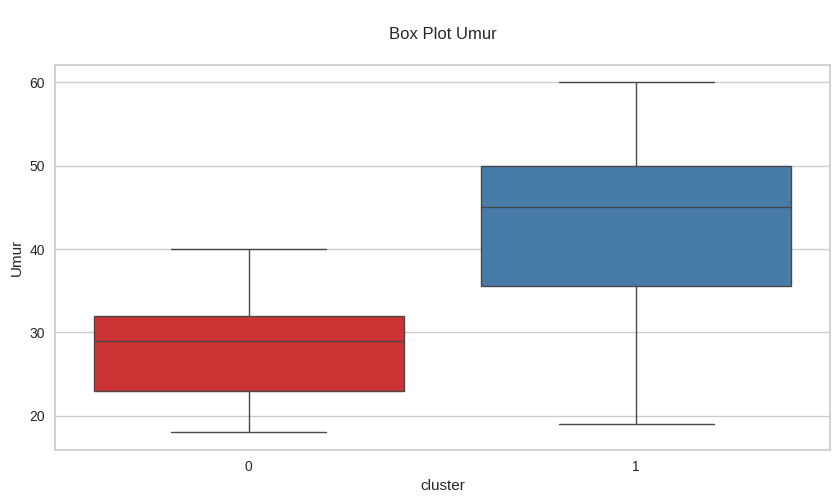

/tmp/ipython-input-624501266.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x = 'cluster',y = i, data = df_final, palette='Set1')


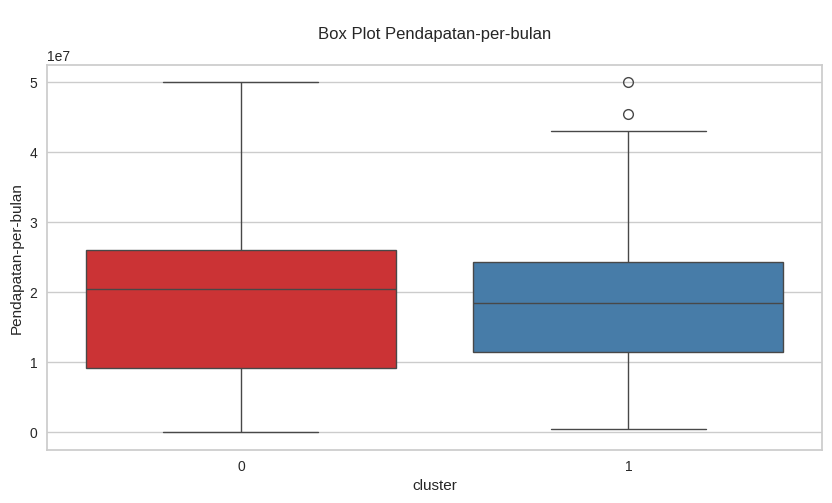

/tmp/ipython-input-624501266.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x = 'cluster',y = i, data = df_final, palette='Set1')


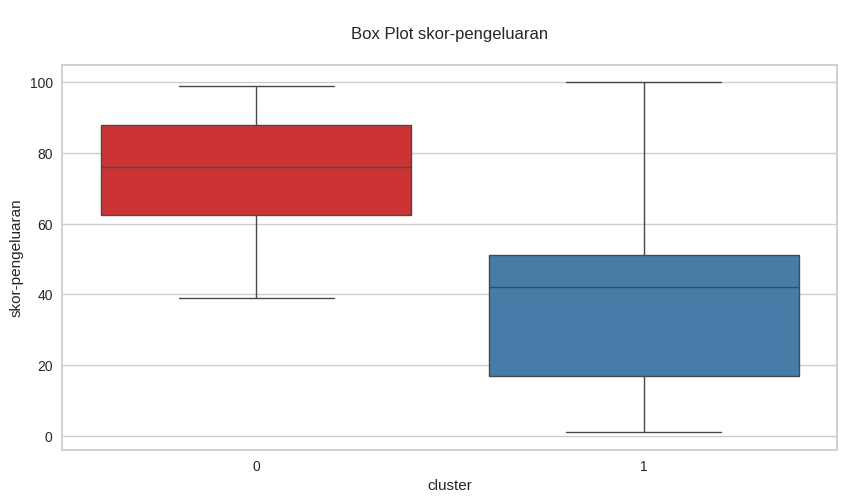

In [63]:
for i in col_num:
    plt.figure(figsize=(10,5))
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final, palette='Set1')
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
    plt.show()

###Visualisasi Distribusi Kategorik Berdasarkan Klaster (2 klaster)

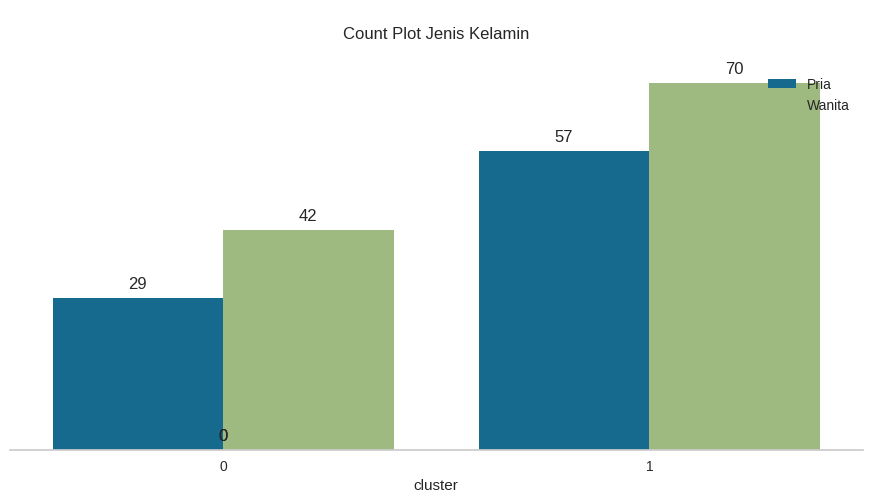

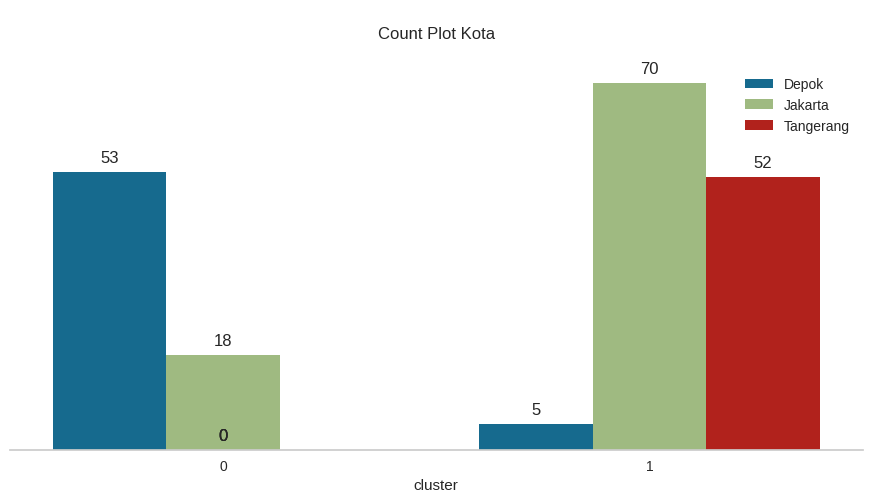

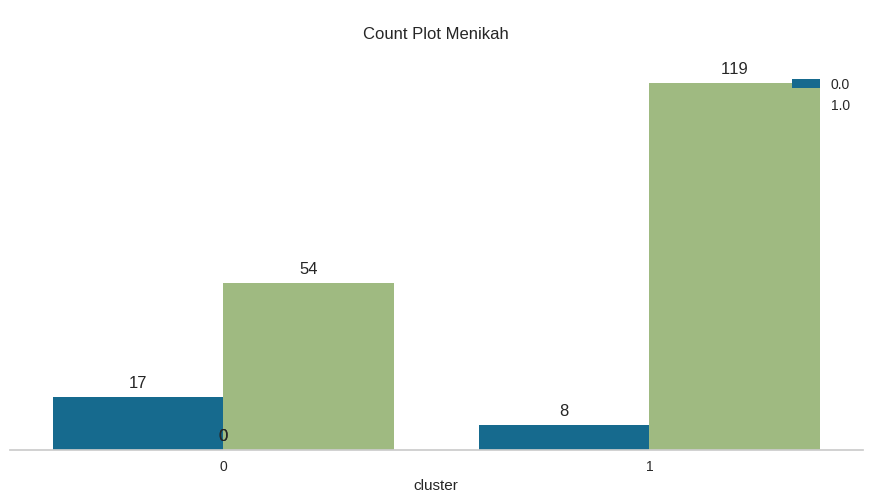

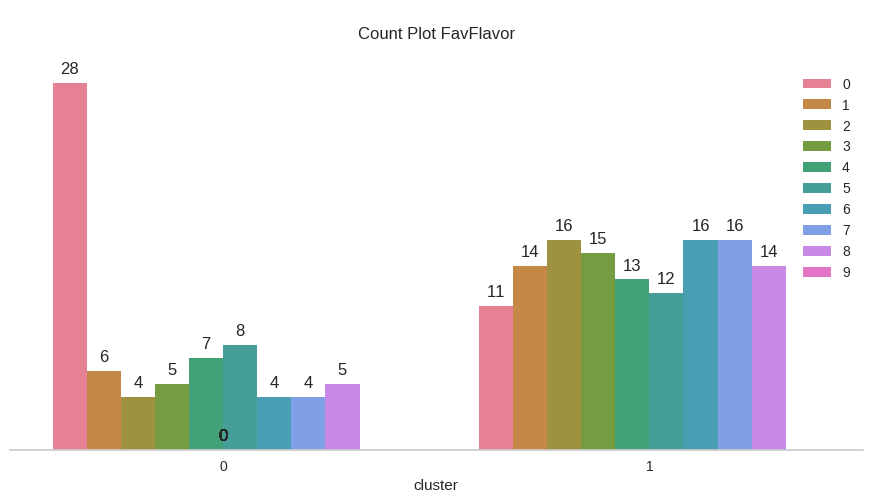

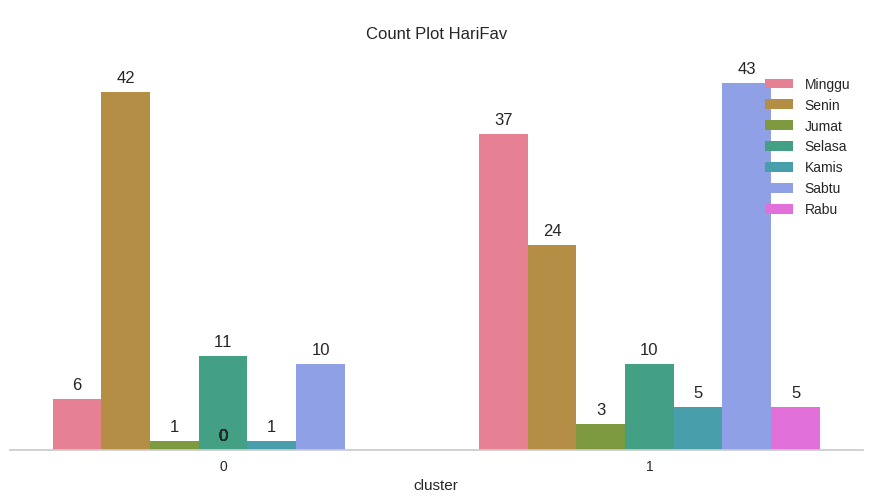

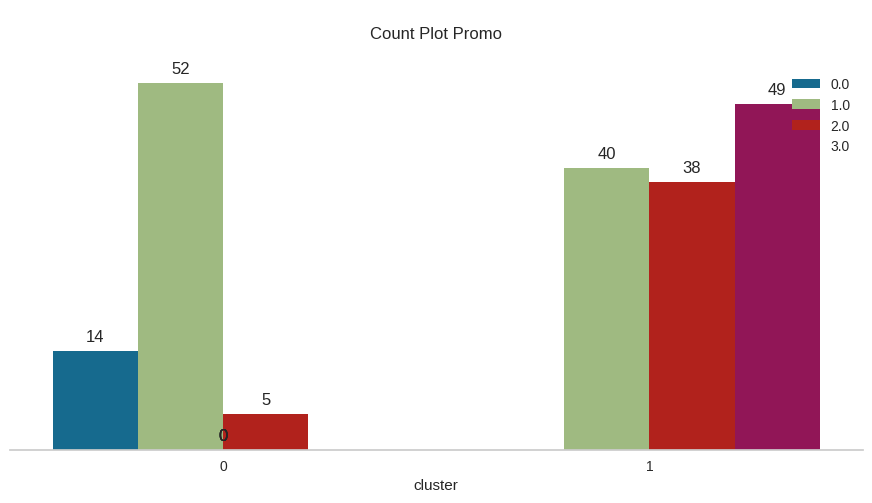

In [64]:
for i in col_cat:
    plt.figure(figsize=(11, 5))
    ax = sns.countplot(data=df_final, x='cluster', hue=i)

    # Set judul
    plt.title(f'\nCount Plot {i}\n', fontsize=12)
    ax.legend(loc="upper right")

    # Menambahkan jumlah di atas setiap bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'),  # Format angka
            (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi di tengah atas bar
            ha='center', va='center',
            xytext=(0, 10), textcoords='offset points'  # Offset vertikal
        )

    # Menghilangkan garis dan sumbu
    sns.despine(right=True, top=True, left=True)
    ax.axes.yaxis.set_visible(False)

    # Tampilkan plot
    plt.show()

In [65]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Jenis Kelamin         198 non-null    category
 1   Umur                  198 non-null    Int64   
 2   Pendapatan-per-bulan  198 non-null    int64   
 3   skor-pengeluaran      198 non-null    int64   
 4   Menikah               198 non-null    category
 5   Kota                  198 non-null    object  
 6   Promo                 198 non-null    category
 7   HariFav               198 non-null    object  
 8   FavFlavor             198 non-null    category
 9   Cluster               198 non-null    int32   
 10  cluster               198 non-null    int32   
dtypes: Int64(1), category(4), int32(2), int64(2), object(2)
memory usage: 20.7+ KB


In [66]:
# Menyimpan objek LabelEncoder untuk setiap kolom
label_encoders = {}

# Ambil kolom kategorik dari df_final
# Pastikan kolom 'Cluster' atau 'cluster' tidak ikut di-encode jika sudah ada
col_cat_to_encode = df_final.select_dtypes(include=['category']).columns.tolist()
# Hapus 'Cluster' dan 'cluster' dari list jika ada, karena ini adalah hasil clustering, bukan fitur asli
if 'Cluster' in col_cat_to_encode:
    col_cat_to_encode.remove('Cluster')
if 'cluster' in col_cat_to_encode:
    col_cat_to_encode.remove('cluster')


for col in col_cat_to_encode:
    le = LabelEncoder()
    # Ubah tipe data kolom menjadi string sebelum di-encode untuk menangani campuran tipe data
    df_final[col] = le.fit_transform(df_final[col].astype(str))
    label_encoders[col] = le

# Menampilkan mapping untuk setiap kolom
for col, le in label_encoders.items():
    print(f"Makna untuk kolom '{col}':")
    for i, class_label in enumerate(le.classes_):
        print(f"  {i}: {class_label}")
    print("\n")

print(df_final.head())

Makna untuk kolom 'Jenis Kelamin':
  0: Pria
  1: Wanita


Makna untuk kolom 'Menikah':
  0: 0.0
  1: 1.0


Makna untuk kolom 'Promo':
  0: 0.0
  1: 1.0
  2: 2.0
  3: 3.0


Makna untuk kolom 'FavFlavor':
  0: 0
  1: 1
  2: 2
  3: 3
  4: 4
  5: 5
  6: 6
  7: 7
  8: 8


   Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran  Menikah  \
0              1    49              13114754                52        1   
1              1    32              33606557                86        1   
2              0    51              15983606                41        1   
3              0    19              12704918                55        0   
4              1    38              20081967                42        1   

      Kota  Promo HariFav  FavFlavor  Cluster  cluster  
0  Jakarta      1   Sabtu          2        1        1  
1    Depok      1  Minggu          6        0        0  
2  Jakarta      2  Minggu          3        1        1  
3  Jakarta      1    Rabu          7        0       

###Visualisasi Pairplot untuk Cluster

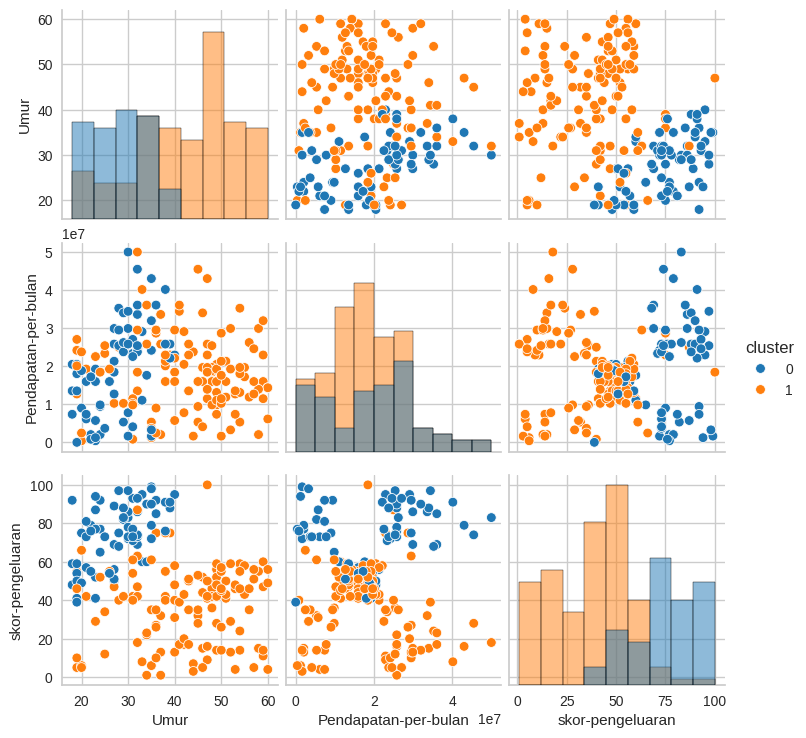

In [67]:
#df_final['cluster'] = C_kpp
gua = sns.pairplot(df_final[['Umur', 'Pendapatan-per-bulan','skor-pengeluaran' ,'cluster']], \
                 hue="cluster", diag_kind="hist", palette="tab10")

###Visualisasi Klaster Berdasarkan Skor Pengeluaran dan Pendapatan

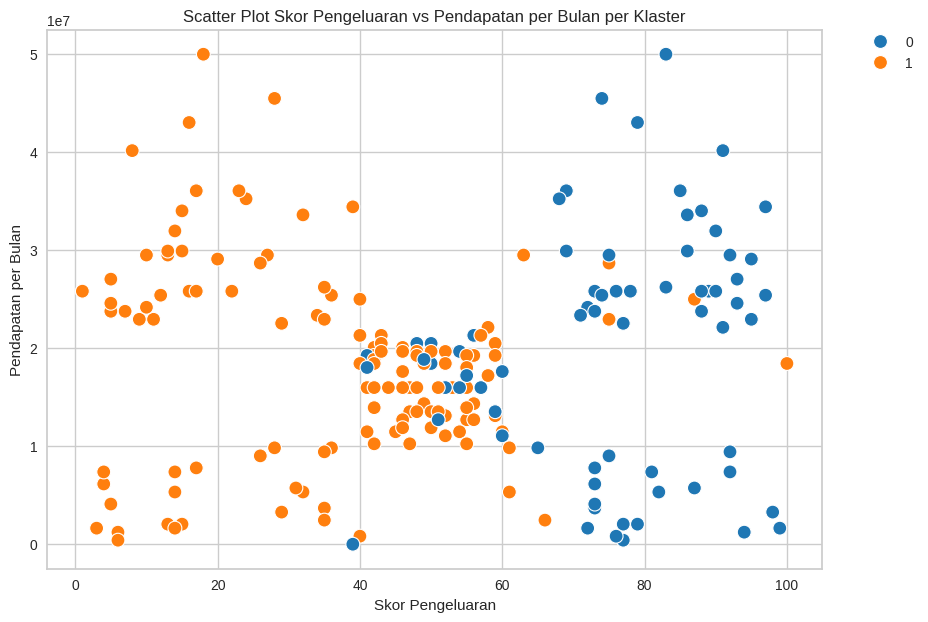

In [68]:
# Mengatur ukuran grafik
plt.figure(figsize=(10, 7))  # Atur sesuai ukuran yang diinginkan

# Membuat scatter plot
io = sns.scatterplot(x='skor-pengeluaran', y='Pendapatan-per-bulan', hue='cluster', data=df_final, palette='tab10', s=100)

# Memindahkan legend ke pojok kanan atas
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Scatter Plot Skor Pengeluaran vs Pendapatan per Bulan per Klaster')
plt.xlabel('Skor Pengeluaran')
plt.ylabel('Pendapatan per Bulan')

# Menampilkan grafik
plt.show()

In [69]:
data_clean['Cluster'].value_counts()

,count
Cluster,
1,111
0,87


###Analisis Distribusi Kategorik Per Cluster

In [70]:
# JUMLAH PRIA/WANITA PER CLUSTER
# ==========================
print("=== Jenis Kelamin per Cluster ===")
print(data_clean.groupby(['Cluster', 'Jenis Kelamin']).size())

# ==========================
# STATUS PERKAWINAN PER CLUSTER
# ==========================
print("\n=== Status Pernikahan per Cluster ===")
print(data_clean.groupby(['Cluster', 'Menikah']).size())

# ==========================
# KOTA PER CLUSTER
# ==========================
print("\n=== Kota per Cluster ===")
print(data_clean.groupby(['Cluster', 'Kota']).size())

# ==========================
# PROMO PER CLUSTER
# ==========================
print("\n=== Promo per Cluster ===")
print(data_clean.groupby(['Cluster', 'Promo']).size())

# ==========================
# HARI PER CLUSTER
# ==========================
print("\n=== Hari per Cluster ===")
print(data_clean.groupby(['Cluster', 'HariFav']).size())

# ==========================
# RASA PER CLUSTER
# ==========================
print("\n=== Rasa per Cluster ===")
print(data_clean.groupby(['Cluster', 'FavFlavor']).size())

=== Jenis Kelamin per Cluster ===
Cluster  Jenis Kelamin
0        Pria             39
         Wanita           48
1        Pria             47
         Wanita           64
dtype: int64

=== Status Pernikahan per Cluster ===
Cluster  Menikah
0        0.0         20
         1.0         67
1        0.0          5
         1.0        106
dtype: int64

=== Kota per Cluster ===
Cluster  Kota     
0        Depok        58
         Jakarta      29
1        Jakarta      59
         Tangerang    52
dtype: int64

=== Promo per Cluster ===
Cluster  Promo
0        0.0      14
         1.0      65
         2.0       8
         3.0       0
1        0.0       0
         1.0      27
         2.0      35
         3.0      49
dtype: int64

=== Hari per Cluster ===
Cluster  HariFav
0        Jumat       1
         Kamis       3
         Minggu      7
         Rabu        2
         Sabtu      15
         Selasa     13
         Senin      46
1        Jumat       3
         Kamis       3
         Minggu   

/tmp/ipython-input-3477317223.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data_clean.groupby(['Cluster', 'Jenis Kelamin']).size())
/tmp/ipython-input-3477317223.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data_clean.groupby(['Cluster', 'Menikah']).size())
/tmp/ipython-input-3477317223.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data_clean.groupby(['Cluster', 'Promo']).size())
/

Cluster 0
* pria = 39, wanita = 48
* menikah = 67, tidak menikah = 20
* Depok = 58, Jakarta = 29, Tangerang = 0
* promo0 = 14, promo1 = 65, promo2 = 8, promo3 = 0
* Jumat = 1, Kamis = 3, Minggu = 7, Rabu = 2, Sabtu = 15, Selasa = 13, Senin = 46
* FavFlavor0 = 29, FavFlavor1 = 7, FavFlavor2 = 5, FavFlavor3 = 5, FavFlavor4 = 9, FavFlavor5 = 10, FavFlavor6 = 6, FavFlavor7 = 7, FavFlavor8 = 9
* Rentang umur = 25–40 tahun
* skor pengeluaran = (60–100)
* Pendapatan per bulan = Rp15.000.000 – Rp30.000.000, dan ada beberapa yang mecapai Rp50.000.000.


Cluster 1

* pria = 47, wanita = 64
* menikah = 106, tidak menikah = 5
* Depok = 0, Jakarta = 59, Tangerang = 52
* promo0 = 0, promo1 = 27, promo2 = 35, promo3 = 49
* Jumat = 3, Kamis = 3, Minggu = 36, Rabu = 3, Sabtu = 38, Selasa = 8, Senin = 20
* FavFlavor0 = 10, FavFlavor1 = 13, FavFlavor2 = 15, FavFlavor3 = 15, FavFlavor4 = 11, FavFlavor5 = 10, FavFlavor6 = 14, FavFlavor7 = 13, FavFlavor8 = 10
* Rentang umur = 30–50 tahun
* Skor pengeluaran = (0–60)
* Pendapatan per bulan = Rp5.000.000 – Rp20.000.000

## Insight dan Rekomendasi


### Insight dan Rekomendasi Berdasarkan Hasil Clustering Pelanggan

##### Insight dari Cluster 0

- Pelanggan high spender & loyal, usia 25-40, mayoritas wanita menikah, dominan di Depok.

- Lebih memilih promo ringan dan jarang menunggu diskon besar sehingga cocok untuk program eksklusif, bukan diskon besar.

- Puncak belanja pada hari Senin & Sabtu sehingga fokus operasional dan staf pada hari tersebut.

- Rasa favorit yaitu Vanilla (anchor flavor) + klasik lain untuk mendapatkan peluang upselling dan bundling.

- Segmentasi ini cocok untuk produk premium, event keluarga, dan personalized marketing.

#####Rekomendari Untuk Cluster 0

- Jadikan Vanilla sebagai signature flavor / anchor product. Tawarkan paket family combo atau “Signature + Rasa Pilihan” untuk cross-selling rasa lain. Perkenalkan varian rasa klasik tambahan yang sesuai selera keluarga.

- Gunakan promo ringan atau value-added, bukan diskon besar. Buat program loyalti eksklusif: poin reward, voucher ulang tahun, akses awal member-only.

- Fokuskan pelayanan dan staf pada hari Senin dan Sabtu untuk mengoptimalkan traffic tinggi. Tambah jam operasional di hari tersebut agar tidak ada antrian.

- Gunakan family-friendly branding: visual ceria, tempat duduk nyaman, menu untuk anak-anak. Adakan event akhir pekan khusus keluarga, misal “MixITup Family Fun Day”.

- Kolaborasi dengan influencer atau brand lain untuk paket edisi terbatas yang menarik segmen high spender.

##### Insight dari Cluster 1

- Terdiri dari pelanggan berusia 25–50 tahun dengan pendapatan menengah, sebagian besar sudah menikah, dan didominasi oleh wanita, berasal dari Jakarta dan Tangerang
- Cenderung sensitif terhadap promo, dengan frekuensi penggunaan promo sedang hingga sering, khususnya pada akhir pekan seperti Sabtu dan Minggu, sehingga peluang promo musiman, bundling Mix 2/3 flavors, dan event weekend untuk mendorong pembelian.
- Rasa es krim favoritnya cukup bervariasi, dengan Chocolate, BlueBerry, Caramel Pecan, Strawberry, serta paket Mix 2 atau Mix 3 Flavors sebagai pilihan utama yang memungkinkan pelanggan terbuka untuk cross-selling, upselling, dan limited edition flavors.

##### Rekomendasi Untuk Cluster 1

- Produk populer seperti Chocolate, BlueBerry, dan Caramel Pecan dapat dijadikan anchor untuk mendorong cross-selling, misalnya menawarkan paket Mix 2 atau Mix 3 Flavors atau tambahan topping saat pelanggan membeli satu rasa favorit.
- Untuk meningkatkan retensi dan pembelian berulang, strategi promosi sebaiknya berbasis value-added dan eksklusivitas, termasuk akses awal member-only promo, pre-order varian baru, loyalty program dengan poin reward, serta promo musiman atau event-based seperti festival, konser, dan event kampus.
- Dari sisi operasional, fokus perlu diberikan pada akhir pekan sebagai hari dengan pembelian tertinggi, dengan penambahan jam operasional atau staf agar pelayanan tetap cepat dan nyaman.
- Strategi profit dapat diperkuat melalui family combo atau paket edisi terbatas, upselling topping atau cup tambahan saat checkout, serta inovasi produk premium dan limited edition yang mengikuti tren, seperti “MixITup Gold Edition” rasa matcha latte atau cookies & cream deluxe, untuk memanfaatkan efek FOMO dan mendorong pembelian impulsif.

### Insight dan Rekomendasi Untuk rencana Scale Bisnis dan Massive Marketing

##### Insight dari Data

- Kota Jakarta saat ini punya jumlah pelanggan terbesar cocok jadi benchmark strategi ekspansi. Kota Tangerang punya karakteristik pelanggan sering pakai promo (tipe 3) dan lebih ramai di weekend, cocok untuk strategi promo agresif dan event mingguan.

- Rasa Vanilla adalah favorit utama pelanggan dan juga dominan pada cluster 0 cocok dijadikan signature flavor cabang baru. Rasa lain tersebar merata sehingga bagus untuk strategi bundling (mix 2-3 rasa) agar pelanggan mencoba varian lain.

- Promo tipe 1 dan 3 paling sering dipakai pelanggan, terutama:
Promo 1 untuk cluster loyal (Depok, Senin, Vanilla)
Promo 3 untuk pelanggan Tangerang, weekend.
Pelanggan yang tidak pakai promo justru punya skor pengeluaran tinggi sehingga ada segmen premium yang bisa ditargetkan dengan loyalty program, bukan diskon besar.

- Hari Senin dan weekend (Sabtu-Minggu) adalah puncak pembelian, terutama pada Cluster 0 : Senin (loyal customer)
Cluster 1 : Sabtu-Minggu (pelanggan promo)

- Mayoritas pelanggan wanita dan sudah menikah sehingga pasar keluarga & dewasa muda sangat potensial.

##### Rekomendasi Untuk Perusahaan

- Target Pasar dan Lokasi Ekspansi :
Untuk ekspansi ke kota baru, pilih kota dengan demografi mirip Jakarta & Tangerang (kota padat, masyarakat dewasa muda, konsumtif terhadap promo).

- Strategi Produk & Rasa : Launch cabang baru dengan vanilla sebagai menu unggulan (signature flavor). Buat paket promo “Signature + Rasa Pilihan” untuk cross-selling rasa lain.

- Strategi Promo : Gunakan promo 1 & 3 sebagai strategi dasar marketing kota baru. Tambahkan program loyalti eksklusif untuk segmen premium (tanpa banyak diskon).

- Waktu Operasional & Aktivitas Pemasaran : Fokuskan campaign besar pada Senin dan weekend. Tambah SDM & jam operasional cabang baru pada hari-hari tersebut.

- Karakteristik Pelanggan : Gunakan family-friendly branding dan paket bundling keluarga. Event khusus keluarga pada akhir pekan bisa meningkatkan traffic.

## Kesimpulan

MixITup dapat memaksimalkan penjualan, retensi pelanggan, dan ekspansi bisnis dengan strategi tersegmentasi berdasarkan perilaku, preferensi rasa, sensitivitas promo, hari puncak belanja, dan demografi. Pendekatan ini memungkinkan perusahaan untuk menyesuaikan produk, promo, operasional, dan branding sesuai kebutuhan tiap cluster, sekaligus memanfaatkan peluang premium, cross-selling, bundling, event-based marketing, dan inovasi produk terbatas untuk meningkatkan profitabilitas dan engagement pelanggan.